In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('easy.jpg',0)

In [3]:
def threshold1(image,k):
    height = image.shape[0]
    width = image.shape[1]
    out_arr = np.zeros((height,width))
    for i in range(height):
        for j in range(width):
            if image[i][j] > k:
                out_arr[i][j] = 1
    return out_arr.astype('uint8')

In [4]:
img1 = threshold1(img,120)
img1 = img1.astype('uint8')

In [5]:
def add_edge(adj,src,dest):
    adj[src].append(dest)
    
def BFS(adj, src, dest, v, pred, dist):
 
    queue = []
  
    visited = [False for i in range(v)];
  
    for i in range(v):
 
        dist[i] = 1000000
        pred[i] = -1;
     
    visited[src] = True;
    dist[src] = 0;
    queue.append(src);
  
    while (len(queue) != 0):
        u = queue[0];
        queue.pop(0);
        for i in range(len(adj[u])):
         
            if (visited[adj[u][i]] == False):
                visited[adj[u][i]] = True;
                dist[adj[u][i]] = dist[u] + 1;
                pred[adj[u][i]] = u;
                queue.append(adj[u][i]);
  
                if (adj[u][i] == dest):
                    return True;
  
    return False;
  
def printShortestDistance(adj, s, dest):
    
    v = len(adj)
    
    pred=[0 for i in range(v)]
    dist=[0 for i in range(v)];
  
    if (BFS(adj, s, dest, v, pred, dist) == False):
        print("Given source and destination are not connected")
        
    else:
        path = []
        crawl = dest;
        path.append(crawl);

        while (pred[crawl] != -1):
            path.append(pred[crawl]);
            crawl = pred[crawl];

        return path

In [6]:
def create_graph(image):
    h = image.shape[0]
    w = image.shape[1]
    adj_list = [[] for i in range(h*w)]
    for i in range(h):
        for j in range(w):
            if image[i][j] == 1:
                if i>0 and image[i-1][j] == 1:
                    adj_list[(i*w)+j].append((i-1)*w + j)
                if j>0 and image[i][j-1] == 1:
                    adj_list[(i*w)+j].append(i*w + j - 1)
                if i<h-1 and image[i+1][j] == 1:
                    adj_list[(i*w)+j].append((i+1)*w + j)
                if j<h-1 and image[i][j+1] == 1:
                    adj_list[(i*w)+j].append(i*w + j + 1)
    return adj_list

In [7]:
graph = create_graph(img1)

In [8]:
h = img.shape[0]
w = img.shape[1]

### Currenty manually enter the source and destination co-ordinates in below cell

In [9]:
source_row = 492
source_col = 100
destination_row = 119
destination_col = 412

In [10]:
source = source_row*w + source_col
destination = destination_row*w + destination_col

In [11]:
path = printShortestDistance(graph,source,destination)

In [12]:
new_img = np.zeros((h,w,3),dtype = 'uint8')

for i in range(h):
    for j in range(w):
        if img1[i][j] == 0:
            new_img[i][j] = (0,0,0)
        if img1[i][j] == 1:
            new_img[i][j] = (255,255,255)
for i in path:
    x = int(i/w)
    y = int(i%w)
    new_img[x][y] = (255,0,0)

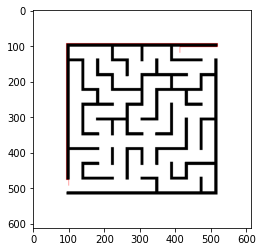

In [13]:
plt.imshow(new_img)

In [14]:
def broaden_line(image,path):
    h = image.shape[0]
    w = image.shape[1]
    for i in range(1,len(path)):
        prev_x = int(path[i-1]/w)
        prev_y = int(path[i-1]%w)
        
        curr_x = int(path[i]/w)
        curr_y = int(path[i]%w)
        
        if(abs(prev_x-curr_x)==1):
            for y in range(curr_y, curr_y-5,-1):
                if(y<0 or image[curr_x][y][0]==0):
                    break
                image[curr_x][y] = (255,0,0)
                
            for y in range(curr_y, curr_y+5):
                if(y>=w or image[curr_x][y][0]==0):
                    break
                image[curr_x][y] = (255,0,0)
        
        else:
            for x in range(curr_x, curr_x-5,-1):
                if(x<0 or image[x][curr_y][0]==0):
                    break
                image[x][curr_y] = (255,0,0)
                
            for x in range(curr_x, curr_x+5):
                if(x>=h or image[x][curr_y][0]==0):
                    break
                image[x][curr_y] = (255,0,0)
                
    return image

In [15]:
final_img = broaden_line(new_img, path)

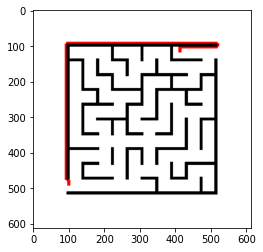

In [16]:
plt.imshow(final_img)

In [17]:
cv2.imwrite('Solution_Circular.jpg',cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR))

True

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
img = cv2.imread('easy.jpg',0)

In [38]:
def threshold(image,k):
    height = image.shape[0]
    width = image.shape[1]
    out_arr = np.zeros((height,width))
    for i in range(height):
        for j in range(width):
            if image[i][j] > k:
                out_arr[i][j] = 1
    return out_arr.astype('uint8')

def threshold1(image,k):
    height = image.shape[0]
    width = image.shape[1]
    out_arr = np.ones((height,width))
    for i in range(height):
        for j in range(width):
            if image[i][j] > k:
                out_arr[i][j] = 0
    return out_arr.astype('uint8')

In [39]:
imgg1 = threshold(img,120)
img1 = threshold1(img,120)

In [22]:
kernel = np.ones((3, 3), np.uint8)

In [23]:
img2 = cv2.erode(img1,kernel)

In [24]:
img3 = img1- img2

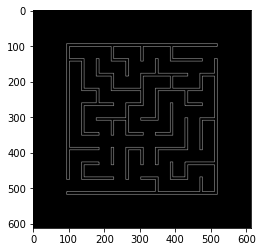

In [25]:
plt.imshow(img3,cmap= 'gray')

In [26]:
h = img3.shape[0]
w = img3.shape[1]

In [27]:
def top_left(img):
    left_top = []
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            if img[i][j] == 1:
                left_top.append(i)
                left_top.append(j)
                return left_top

def bottom_right(img):
    right_bottom = []
    h,w = img.shape
    for i in range(h-1,0,-1):
        for j in range(w-1,0,-1):
            if img[i][j] == 1:
                right_bottom.append(i)
                right_bottom.append(j)
                return right_bottom

In [28]:
left_top = top_left(img3)
right_bottom = bottom_right(img3)

In [29]:
multi_fac = np.zeros((h,w))
multi_fac[left_top[0]:right_bottom[0],left_top[1]:right_bottom[1]] = 1

In [30]:
temp1 = (np.logical_not(img1)).astype(int)
temp = temp1*multi_fac

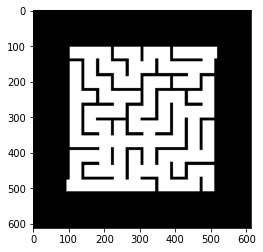

In [31]:
plt.imshow(temp,cmap='gray')

In [32]:
source_row = 490
source_col = 110
destination_row = 110
destination_col = 490

source = source_row*w + source_col
destination = destination_row*w + destination_col

In [33]:
graph = create_graph(temp)

In [34]:
path = printShortestDistance(graph,source,destination)

In [40]:
new_img = np.zeros((h,w,3),dtype = 'uint8')

for i in range(h):
    for j in range(w):
        if imgg1[i][j] == 0:
            new_img[i][j] = (0,0,0)
        if imgg1[i][j] == 1:
            new_img[i][j] = (255,255,255)
for i in path:
    x = int(i/w)
    y = int(i%w)
    new_img[x][y] = (255,0,0)

In [41]:
final_img = broaden_line(new_img, path)

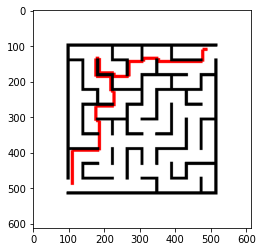

In [42]:
plt.imshow(final_img)